### Name: Sagnik Pal
### Registration Number: 17BCE0847

### Model Performance 
* **Training Accuracy:  99.79 %**
* **Testing Accuracy:  99.11 %**

### Seeting Seed Value for consistent Performance

In [1]:
seed_value= 5

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)

(15036, 216)


In [4]:
dataset.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [5]:
dataset.describe(include='all')

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,...,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9476
mean,0.426443,0.446595,0.442671,0.413208,0.444932,0.486898,0.236632,0.330806,0.282389,0.312583,...,0.233307,0.017425,0.004256,0.434424,0.666135,0.290835,0.016028,0.007050,0.044959,NaN
std,0.494576,0.497156,0.496719,0.492426,0.496975,0.499845,0.425029,0.470519,0.450177,0.463561,...,0.422950,0.130852,0.065105,0.495698,0.471608,0.454163,0.125588,0.083669,0.207220,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN


### Dataset Cleaning

In [6]:
# creating input features and target variables
X= dataset.iloc[:,0:215]
Y= dataset.iloc[:,215]

cols = list(X)
for col in cols:
    for row in range(1, len(X.index)):
        if X[col][row] == '?':
            X[col][row] = 0
    pd.to_numeric(X[col])

In [7]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

print(Y)
print(encoded_Y)

0        S
1        S
2        S
3        S
4        S
        ..
15031    B
15032    B
15033    B
15034    B
15035    B
Name: class, Length: 15036, dtype: object
[1 1 1 ... 0 0 0]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.3, random_state = seed_value)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10525, 215)
(4511, 215)
(10525,)
(4511,)


### Building the Multi-Layer Perceptron

In [9]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = 215))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
#Compiling the neural network
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics =['accuracy'])

In [11]:
history = model.fit(
    X_train, 
    y_train,
    epochs = 100,
    batch_size = 150,
    validation_data = (X_test, y_test),
    shuffle = True
)

Train on 10525 samples, validate on 4511 samples
Epoch 1/100
10525/10525 [==============================] - 1s 75us/step - loss: 0.4999 - accuracy: 0.6733 - val_loss: 0.3600 - val_accuracy: 0.9477
Epoch 2/100
10525/10525 [==============================] - 1s 49us/step - loss: 0.3548 - accuracy: 0.9141 - val_loss: 0.2899 - val_accuracy: 0.9663
Epoch 3/100
10525/10525 [==============================] - 1s 52us/step - loss: 0.2988 - accuracy: 0.9535 - val_loss: 0.2561 - val_accuracy: 0.9721
Epoch 4/100
10525/10525 [==============================] - 1s 48us/step - loss: 0.2594 - accuracy: 0.9648 - val_loss: 0.2144 - val_accuracy: 0.9763
Epoch 5/100
10525/10525 [==============================] - 0s 47us/step - loss: 0.1835 - accuracy: 0.9680 - val_loss: 0.0979 - val_accuracy: 0.9785
Epoch 6/100
10525/10525 [==============================] - 0s 47us/step - loss: 0.1208 - accuracy: 0.9729 - val_loss: 0.0653 - val_accuracy: 0.9812
Epoch 7/100
10525/10525 [==============================] - 1s 4

Epoch 56/100
10525/10525 [==============================] - 1s 50us/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.0776 - val_accuracy: 0.9891
Epoch 57/100
10525/10525 [==============================] - 1s 56us/step - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0820 - val_accuracy: 0.9887
Epoch 58/100
10525/10525 [==============================] - 1s 53us/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0752 - val_accuracy: 0.9883
Epoch 59/100
10525/10525 [==============================] - 1s 69us/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.0759 - val_accuracy: 0.9896
Epoch 60/100
10525/10525 [==============================] - 1s 72us/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.0895 - val_accuracy: 0.9896
Epoch 61/100
10525/10525 [==============================] - 1s 62us/step - loss: 0.0158 - accuracy: 0.9943 - val_loss: 0.0748 - val_accuracy: 0.9885
Epoch 62/100
10525/10525 [==============================] - 1s 71us/step - loss: 0.0138 - accuracy: 0.9957

### Testing Accuracy: 99.11 % (Accuracy corresponding to maximum validation accuracy is taken for best performance)

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 1)
print('Test accuracy:', test_acc*100)

4511/4511 [==============================] - 3s 628us/step
Test accuracy: 99.11210484886169


In [13]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


### Accuracy and Loss Plots of Model

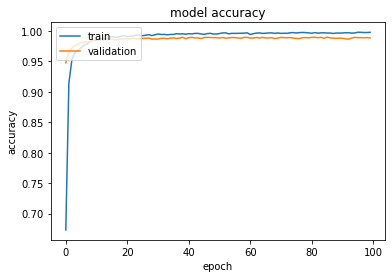

In [14]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

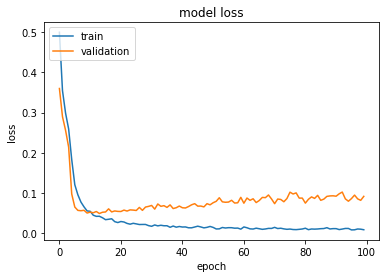

In [15]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

### Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2807   27]
 [  24 1653]]
